In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from vocalseg.examples import starling
from vocalseg.utils import butter_bandpass_filter, spectrogram, int16tofloat32, plot_spec

In [3]:
# load data
rate, data = starling()
# filter data
data = butter_bandpass_filter(int16tofloat32(data), 500, 20000, rate)

In [4]:
#data = data[:rate*12]

In [5]:
figsize = (30,3)

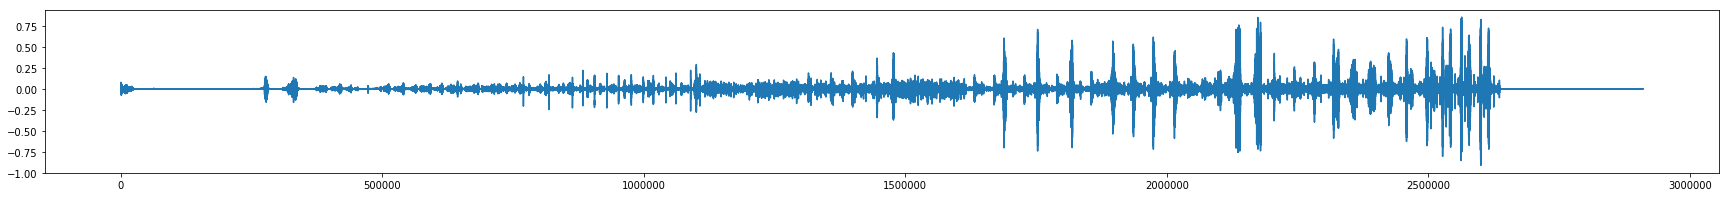

In [6]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(data)

### Generate spectrogram
- view docstrings for more info

In [7]:
### parameters
n_fft=1024
hop_length_ms=2
win_length_ms=10
ref_level_db=20
pre=0.97
min_level_db=-80
silence_threshold = 0.01
min_silence_for_spec=0.1
max_vocal_for_spec=1.0,
min_syllable_length_s = 0.01
spectral_range = [500, 20000]
mask_thresh_std = 0.25
neighborhood_thresh=0.5
max_element_len_ms=2000
neighborhood_time_ms=10
neighborhood_freq_hz=500
temporal_neighbor_merge_distance_ms= 0
overlapping_element_merge_thresh= 0.25
min_element_size_ms_hz = [5, 500]

In [8]:
spec = spectrogram(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
)
np.shape(spec)

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


(513, 33070)

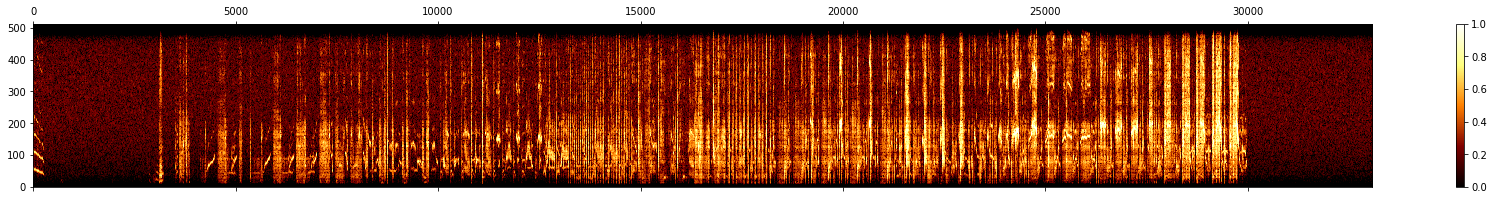

In [9]:
fig, ax = plt.subplots(figsize=figsize)
plot_spec(spec, fig, ax);

### segment vocalization using continuity segmenation

In [10]:
from vocalseg.continuity_filtering import continuity_segmentation

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


longest silence 0.10199999999999676
longest vocalization 2.1639999999999944
Current min_level_db: -80
longest silence 0.12400000000000233
longest vocalization 2.1639999999999944
Current min_level_db: -75
longest silence 0.09199999999999875
longest vocalization 2.1639999999999944
Current min_level_db: -70
longest silence 0.12400000000000233
longest vocalization 2.1639999999999944
Current min_level_db: -65
longest silence 6.204000000000001
longest vocalization 1.0419999999999998
Current min_level_db: -60
longest silence 6.207999999999998
longest vocalization 0.8780000000000001


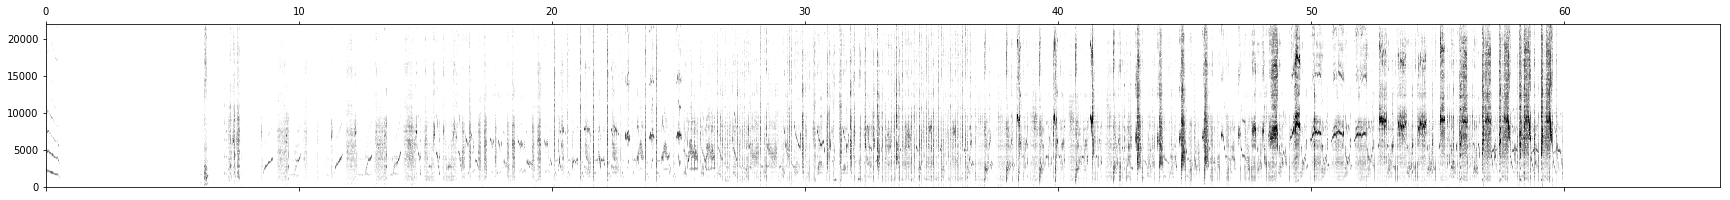

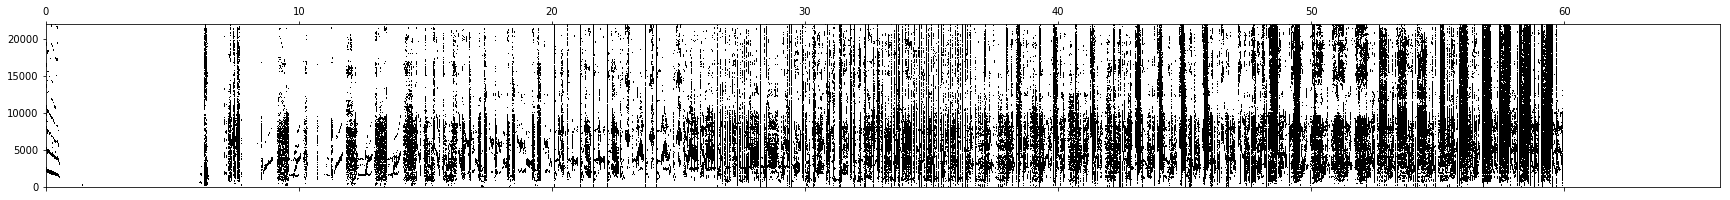

(11, 5)


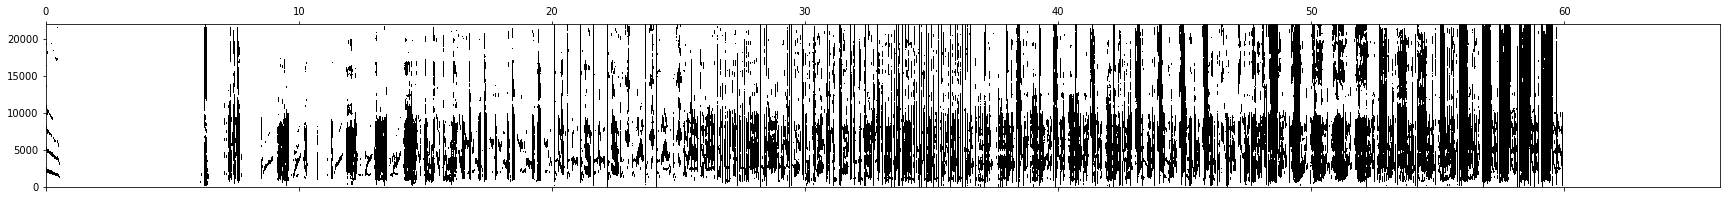

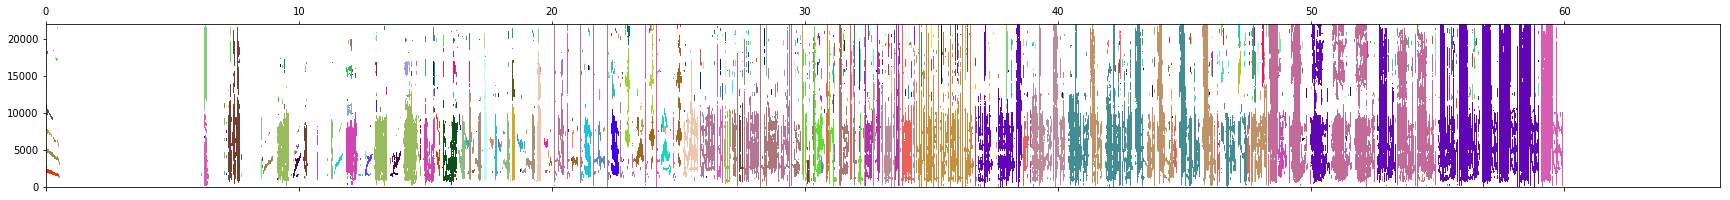

unique elements: 2548


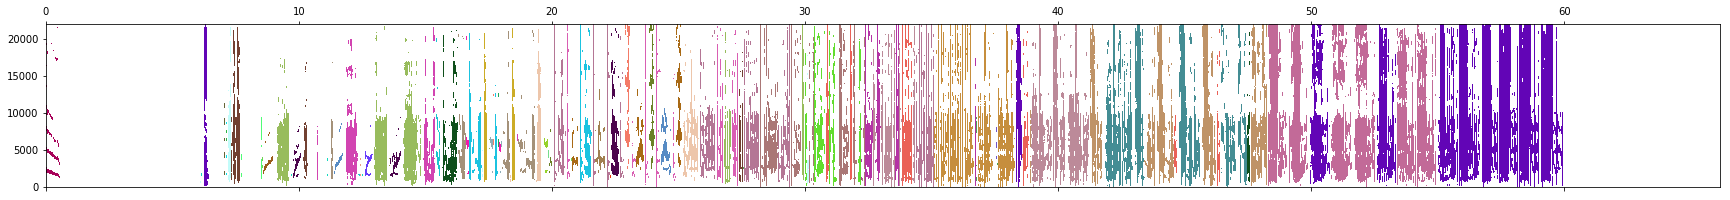

unique elements: 205
29


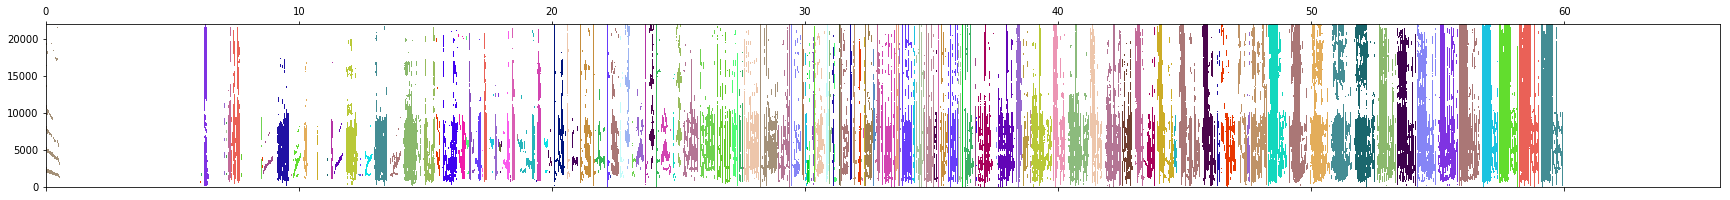

unique elements: 86
-55


In [12]:
results = continuity_segmentation(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
    verbose=True,
    spectral_range=spectral_range,
    mask_thresh_std=mask_thresh_std,
    figsize=figsize,
    neighborhood_thresh=neighborhood_thresh,
    max_element_len_ms=max_element_len_ms,
    neighborhood_time_ms=neighborhood_time_ms,
    neighborhood_freq_hz=neighborhood_freq_hz,
    silence_threshold=silence_threshold,
    temporal_neighbor_merge_distance_ms=temporal_neighbor_merge_distance_ms,
    overlapping_element_merge_thresh=overlapping_element_merge_thresh,
    min_element_size_ms_hz=min_element_size_ms_hz,
)
print(results["min_level_db"])

In [ ]:
from vocalseg.continuity_filtering import plot_labelled_elements

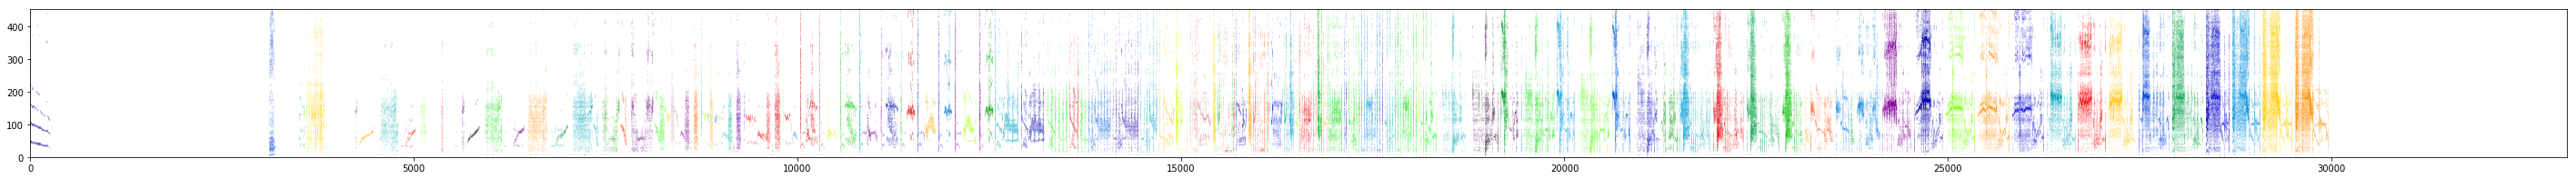

In [102]:
labelled_spec = plot_labelled_elements(results['elements'], results['spec'], figsize=(50,3)); 